# Exploratory Data Analysis Notebook

In [3]:
import import_tool

import pandas as pd
import numpy as np
import json
import seaborn as sns
import datetime
import tools
import pre_process as pp
import nest_asyncio
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import logging

In [4]:
#%% Logging set up
logger = logging.basicConfig(format='[%(levelname)s %(module)s] %(asctime)s - %(message)s', level = logging.INFO)
logger = logging.getLogger(__name__)
pd.set_option('display.max_columns', None)
player_categories = ["Goalkeeper", "Defender", "Midfielder", "Forward"]
position_colors_list = ["red", "blue", "Orange", "Green"]
position_colors = {cat: color for cat, color in zip(player_categories, position_colors_list)}

In [5]:
today = '_'.join(str(datetime.datetime.today()).split(' ')[0].split('-'))
try:
    logger.info(f"Looking for files dated - {today}")
    df = pd.read_pickle("../.data/" + today + "_df")
    gw_df = pd.read_pickle("../.data/" + today + "_gw_df")
    logger.info("Files found, skipping data download and procesing")
except FileNotFoundError:
    logger.info("Files not found. Attempting to download and process data now.")
    df, gw_df = pp.main(save_to_file=True)
    logger.info("Successfully downloaded and processed data.")

[INFO 4205385147] 2022-03-11 16:29:05,376 - Looking for files dated - 2022_03_11
[INFO 4205385147] 2022-03-11 16:29:05,391 - Files found, skipping data download and procesing


In [6]:
px.pie(df.groupby(['element_type'])['player_name'].count().reset_index(),
                  names='element_type',
                  values='player_name',
                  color='element_type',
                  hole=.3,
                  color_discrete_map=position_colors
                  )

In [7]:
#Mean total points
px.pie(df.groupby(['element_type'])['total_points'].mean().reset_index(),
                  names='element_type',
                  values='total_points',
                  color='element_type',
                  hole=.3,
                  color_discrete_map=position_colors
                  )

In [8]:
value_df = gw_df.groupby(['player_name','round'])[['value']].max()
value_df #= value_df[value_df['value'] >]

value
player_name      round       
Aaron Cresswell  1       55.0
                 2       55.0
                 3       55.0
                 4       55.0
                 5       55.0
...                       ...
Álvaro Fernández 24      45.0
                 25      45.0
                 26      45.0
                 27      45.0
                 28      45.0

[9660 rows x 1 columns]

In [9]:
# px.pie(df.groupby(['element_type'])['player_name'].count().reset_index(),
#                   names='element_type',
#                   values='player_name',
#                   color='element_type',
#                   hole=.3,
#                   color_discrete_map=position_colors
#                   )

px.scatter(df, 
           x='now_cost', y='total_points',
           color='element_type',
           color_discrete_map=position_colors,
           hover_data= ['player_name'],
           title='Total points vs Current Price'
              )

# sns.scatterplot(x = df['now_cost'], y = df['total_points'], hue=df['element_type'], palette=position_colors)

In [10]:
df['points_per_game'] = pd.to_numeric(df['points_per_game'])
df['xA'] = pd.to_numeric(df['xA'])
df['xG'] = pd.to_numeric(df['xG'])
df['shots'] = pd.to_numeric(df['shots'])
df['key_passes'] = pd.to_numeric(df['key_passes'])
df['selected_by_percent'] = pd.to_numeric(df['selected_by_percent'])
df['form'] = pd.to_numeric(df['form'])

px.scatter(df, 
           x='now_cost', y='points_per_game',
           color='element_type',
           color_discrete_map=position_colors,
           hover_data= ['player_name', 'games'],
           title='Points per Game vs Current Price'
              )


#sns.scatterplot(x = df['now_cost'], y = df['points_per_game'], hue=df['element_type'], palette=position_colors)

In [11]:
px.scatter(df, 
           x='xG', y='goals_scored',
           color='element_type',
           color_discrete_map=position_colors,
           hover_data= ['player_name'],
           title='Goals scored vs xG'
              )

#sns.scatterplot(x = df['xG'], y = df['goals_scored'], hue=df['element_type'], palette=position_colors)

In [12]:
px.scatter(df, 
           x='xA', y='assists',
           color='element_type',
           color_discrete_map=position_colors,
           hover_data= ['player_name'],
           title='Assists provided vs xA'
              )

#sns.scatterplot(x = df['xA'], y = df['assists'], hue=df['element_type'], palette=position_colors)

In [13]:
px.scatter(df, 
           x='xA', y='xG',
           color='element_type',
           color_discrete_map=position_colors,
           hover_data= ['player_name'],
           title='xG vs xA'
              )

#sns.scatterplot(x = df['xA'], y = df['xG'], hue=df['element_type'], palette=position_colors)

In [14]:
px.scatter(df, 
           x='now_cost', y='dreamteam_count',
           color='element_type',
           color_discrete_map=position_colors,
           hover_data= ['player_name'],
           title='Dreamteam count vs Cost'
              )

#sns.scatterplot(x = df['now_cost'], y = df['dreamteam_count'], hue=df['element_type'], palette=position_colors)

In [15]:
px.scatter(df, 
           x='selected_by_percent', y='total_points',
           color='element_type',
           color_discrete_map=position_colors,
           hover_data= ['player_name'],
           title='Total Points vs Selected By Percent'
              )

#'selected_by_percent'sns.scatterplot(x = df['selected_by_percent'], y = df['total_points'], hue=df['element_type'], palette=position_colors)

In [16]:
px.scatter(df, 
           x='selected_by_percent', y='form',
           color='element_type',
           color_discrete_map=position_colors,
           hover_data= ['player_name'],
           title='Total Points vs Selected By Percent'
              )


#sns.scatterplot(x = df['selected_by_percent'], y = df['form'], hue=df['element_type'], palette=position_colors)

<AxesSubplot:xlabel='total_points', ylabel='form'>

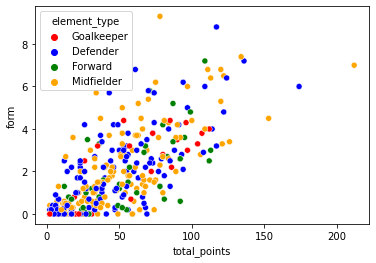

In [17]:
px.scatter(df, 
           x='selected_by_percent', y='form',
           color='element_type',
           color_discrete_map=position_colors,
           hover_data= ['player_name'],
           title='Total Points vs Selected By Percent'
              )


sns.scatterplot(x = df['total_points'], y = df['form'], hue=df['element_type'], palette=position_colors)

Data will be displayed using python dash dashboard